## Section 2-2: Dynamic Optimization

### Problem 1 - Introduction

See [Benchmark Problem 1a](https://apmonitor.com/do/index.php/Main/DynamicOptimizationBenchmarks) for additional information.

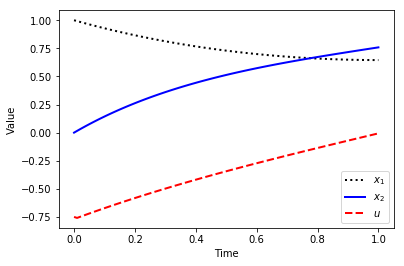

In [4]:
from gekko import GEKKO
import numpy as np
m = GEKKO(remote=False)
nt = 101; m.time = np.linspace(0,1,nt)
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=-0.75)
p = np.zeros(nt); p[-1] = 1.0
final = m.Param(value=p)
m.Equation(x1.dt()==u)
m.Equation(x2.dt()==x1**2 + u**2)
m.Obj(x2*final)
m.options.IMODE = 6
m.solve(disp=False)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot(m.time,x1.value,'k:',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',LineWidth=2,label=r'$x_2$')
plt.plot(m.time,u.value,'r--',LineWidth=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### Problem 2 - Integral Objective

See [Luus Benchmark Problem](https://apmonitor.com/do/index.php/Main/IntegralObjective) for additional information.

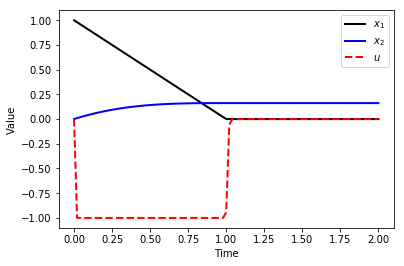

In [6]:
import numpy as np
from gekko import GEKKO
m = GEKKO(remote=False)
nt = 101;  m.time = np.linspace(0,2,nt)
x1 = m.Var(value=1)
u = m.Var(value=0,lb=-1,ub=1)
p = np.zeros(nt);  p[-1] = 1.0
final = m.Param(value=p)
x2 = m.Intermediate(m.integral(0.5*x1**2))
m.Obj(x2*final)
m.Equation(x1.dt()==u)
m.options.IMODE = 6
m.solve(disp=False)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot(m.time,x1.value,'k-',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',LineWidth=2,label=r'$x_2$')
plt.plot(m.time,u.value,'r--',LineWidth=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### Problem 3 - Fishing Optimization

See [Fishing Economic Optimization](https://apmonitor.com/do/index.php/Main/EconomicDynamicOptimization) for additional information.

In [ ]:
from gekko import GEKKO
import numpy as np
m = GEKKO()
n=501; m.time = np.linspace(0,10,n)
E = 1; c = 17.5; r = 0.71
k = 80.5; U_max = 20
u = m.MV(value=1,lb=0,ub=1)
u.STATUS = 1; u.DCOST = 0
x = m.Var(value=70)
m.Equation(x.dt() == r*x*(1-x/k)-u*U_max)
J = m.Var(value=0)
Jf = m.FV(); Jf.STATUS = 1
m.Connection(Jf,J,pos2='end')
m.Equation(J.dt() == (E-c/x)*u*U_max)
m.Maximize(Jf)
m.options.IMODE = 6; m.options.NODES = 3
m.solve()
print('Optimal Profit: ' + str(Jf.value[0]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(2,1,1)
plt.plot(m.time,J.value,'r--',label='profit')
plt.plot(m.time[-1],Jf.value[0],'ro',markersize=10,\
         label='final profit = '+str(np.round(Jf.value[0],2)))
plt.plot(m.time,x.value,'b-',label='fish population')
plt.ylabel('Value')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,u.value,'k.-',label='fishing rate')
plt.ylabel('Rate')
plt.xlabel('Time (yr)')
plt.legend()
plt.show()